In [34]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import cross_sections as cs
from constants import g1_nu_e, g2_nu_e, g1_barnu_e, g2_barnu_e, g1_nu_x, g2_nu_x, g1_barnu_x, g2_barnu_x
import pandas as pd
from scipy.interpolate import interp1d
from scipy.integrate import simps
import seaborn as sns
from tqdm import tqdm

In [2]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [3]:
x = np.linspace(5, 100, 1000)

In [4]:
channels = ['ibd','nue_e','nue_O16','nue_Ar40','nuebar_e', 'nue_C12', 'nc_nue_C12',
         'nuebar_O16','numu_e','numubar_e','nc_nue_O16','nuebar_Ar40',
         'nc_nue_Ar40']
labels = [r'IBD', r'$e \nu_e \mathrm{ES}$', r'$^{16}\mathrm{O}\nu_e\mathrm{CC}$',
          r'$^{40}\mathrm{Ar}\nu_e\mathrm{CC}$',r'$e \overline{\nu}_e \mathrm{ES}$',
         r'$^{12}\mathrm{C}\nu_e\mathrm{CC}$',r'$^{12}\mathrm{C}\nu\mathrm{NC}$',
         r'$^{16}\mathrm{O}\overline{\nu}_e\mathrm{CC}$', r'$e \nu_x \mathrm{ES}$',
         r'$e \overline{\nu}_x \mathrm{ES}$',r'$^{16}\mathrm{O}\nu\mathrm{NC}$',
         r'$^{40}\mathrm{Ar}\overline{\nu}_e\mathrm{CC}$']
colors = [sns.color_palette('inferno',7)[0],sns.color_palette('inferno',7)[1],
          sns.color_palette('inferno',7)[2],sns.color_palette('inferno',7)[3],
          sns.color_palette('inferno',7)[1],sns.color_palette('inferno',7)[4],
          sns.color_palette('inferno',7)[5],sns.color_palette('inferno',7)[2],
          sns.color_palette('inferno',7)[1],sns.color_palette('inferno',7)[1],
          sns.color_palette('inferno',7)[6],sns.color_palette('inferno',7)[3]]
styles = ['solid','solid','solid','solid','dashed','solid','solid','dashed','dotted',
         '-.','solid','dashed']
indexes = [4,1,1,1,4,1,4,4,2,5,1,4,4,1,4]
xs_data = cs.snowglobes(channels)

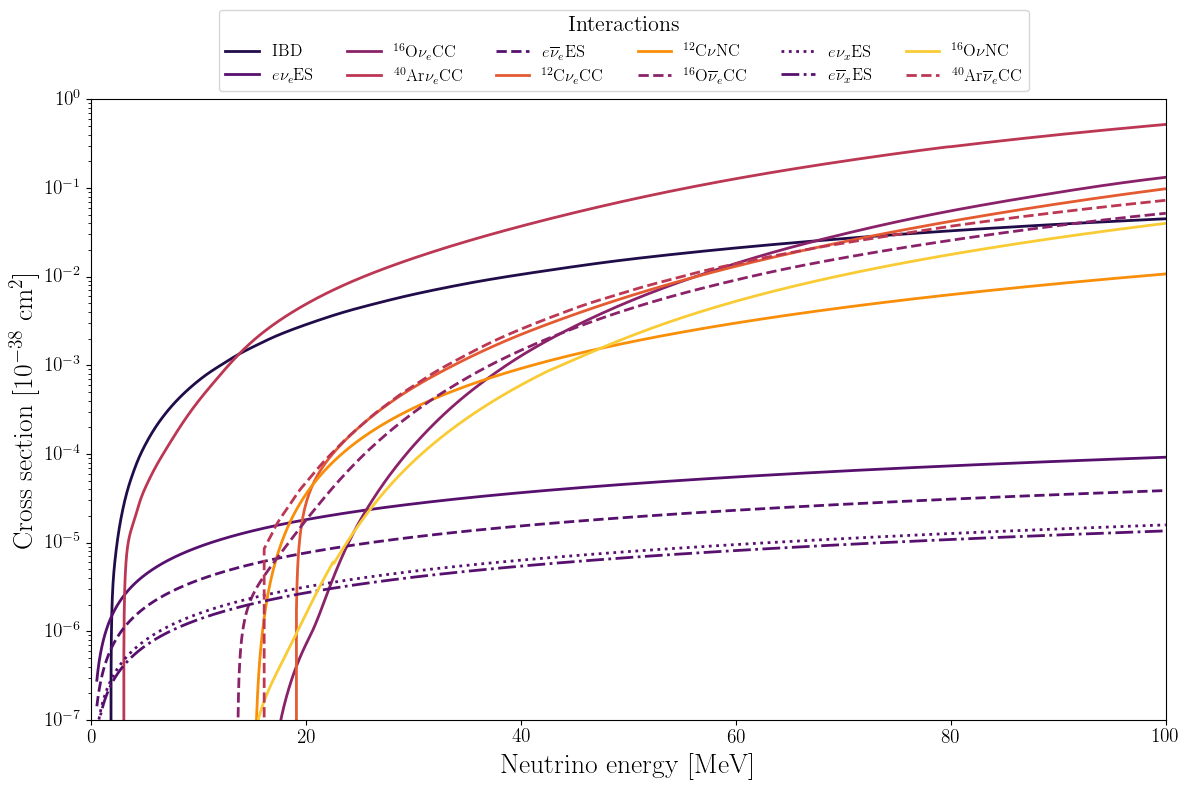

In [5]:
fig = plt.figure(figsize=(12,8))
for i in range(12):
    plt.plot((10**3)*(10**(xs_data[i][0])),xs_data[i][indexes[i]]*(10**(xs_data[i][0])),
         label=labels[i], color = colors[i], ls = styles[i], lw = 2)

plt.yscale('log')
lgd = plt.legend(title = 'Interactions', loc='lower right', ncol = 6, bbox_to_anchor = (0.88,1),
        fontsize = 12)
title = lgd.get_title()
title.set_fontsize(16)
plt.xlabel('Neutrino energy [MeV]', fontsize = 20)
plt.ylabel(r'Cross section [$10^{-38}$ cm$^{2}$]', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlim(0, 100)
plt.ylim(1e-7, 1)
plt.tight_layout()
fig.patch.set_alpha(1)
for ax in fig.axes:
        ax.patch.set_alpha(1)
# plt.savefig('Plots/cross_sections_neutrinos_boladives.svg',
#             bbox_inches = 'tight', dpi = 300)
plt.show()

In [22]:
def plot_total_cs(x, detector, plot_total = False, save = False):
    if detector == 'Super-k' or detector == 'Hyper-k':
        channels = ['ibd','nue_e','nue_O16','nuebar_e', 
         'nuebar_O16','numu_e','numubar_e']
        labels = [r'IBD',
                  r'$e \nu_e \mathrm{ES}$',
                  r'$^{16}\mathrm{O}\nu_e\mathrm{CC}$',
                  r'$e \overline{\nu}_e \mathrm{ES}$',
                  r'$^{16}\mathrm{O}\overline{\nu}_e\mathrm{CC}$',
                  r'$e \nu_x \mathrm{ES}$',
                  r'$e \overline{\nu}_x \mathrm{ES}$']
        colors = [sns.color_palette('inferno',7)[4],sns.color_palette('inferno',7)[1],
                  'teal',sns.color_palette('inferno',7)[1],
                  'teal',sns.color_palette('inferno',7)[1],
                  sns.color_palette('inferno',7)[1]]
        styles = ['solid','solid','solid','dashed','dashed','dotted','-.']
        indexes = [4,1,1,4,4,2,5,1,4,4,1]
        xs_data = cs.snowglobes(channels)
        
        fig, ax = plt.subplots(figsize=(12,8))
        tot = []
        for i in range(len(channels)):
            cs_temp = interp1d(1e3*(10**(xs_data[i][0])),xs_data[i][indexes[i]]*(10**(xs_data[i][0])),
                         fill_value = 'extrapolate')
            cs_new = cs_temp(x)
            tot.append(cs_new)
            plt.plot(1e3*(10**(xs_data[i][0])),xs_data[i][indexes[i]]*(10**(xs_data[i][0])),
                 label=labels[i], color = colors[i], ls = styles[i], lw = 2)
        if plot_total:
            plt.plot(x, np.sum(tot, axis = 0),
                     color = 'black', lw = 2)

        plt.yscale('log')
        lgd = plt.legend(title = 'Interaction channels Super(Hyper)-Kamiokande', loc='lower right', ncol = 4,
                         bbox_to_anchor = (0.75,1), fontsize = 12)
        title = lgd.get_title()
        ax.add_artist(lgd)
        title.set_fontsize(16)
        plt.xlabel('Neutrino energy [MeV]', fontsize = 20)
        plt.ylabel(r'Cross section [$10^{-38}$ cm$^{2}$]', fontsize = 20)
        plt.xticks(fontsize = 14)
        plt.yticks(fontsize = 14)
        plt.xlim(0, 100)
        plt.ylim(1e-7, 1)
        # plt.xscale('log')
        # plt.xlim(5e-1, 100)
        fill1 = plt.fill_between([0,1.89], 1e-7, 1, color = 'grey', alpha = 0.2)
        plt.vlines(1.89, 1e-7, 1, lw = 1, color = 'dimgrey', ls = 'dotted')
        fill2 = plt.fill_between([1.89,67.4], 1e-7, 1, color = 'orange', alpha = 0.2)
        plt.vlines(67.4, 1e-7, 1, lw = 1, color = 'dimgrey', ls = 'dotted')
        fill3 = plt.fill_between([67.4,100], 1e-7, 1, color = 'dodgerblue', alpha = 0.1)
        lgd2 = plt.legend([fill1,fill2,fill3], [r'$e \nu_e \mathrm{ES}$ dominant: E $<$ 1.9 MeV',
                                               r'IBD dominant: 1.9 $\leq$ E $<$ 67.4 MeV',
                                               r'$^{16}\mathrm{O}\nu_e\mathrm{CC}$ dominant: E $\geq$ 67.4 MeV'],
                          loc='upper center', ncol = 3, fontsize = 13, framealpha = 0.5)
        ax.add_artist(lgd2)
        plt.tight_layout()
        fig.patch.set_alpha(1)
        for ax in fig.axes:
                ax.patch.set_alpha(1)
        if save:
            plt.savefig(f'Plots/cross_sections_neutrinos_{detector}.png',
                        bbox_inches = 'tight', dpi = 300)
        plt.show()
        
    elif detector == 'DUNE':
        channels = ['nue_e','nuebar_e','numu_e','numubar_e',
                    'nue_Ar40','nuebar_Ar40','nc_nue_Ar40']
        labels = [r'$e \nu_e \mathrm{ES}$',r'$e \overline{\nu}_e \mathrm{ES}$',r'$e \nu_x \mathrm{ES}$',
                  r'$e \overline{\nu}_x \mathrm{ES}$',r'$^{40}\mathrm{Ar}\nu_e\mathrm{CC}$',
                  r'$^{40}\mathrm{Ar}\overline{\nu}_e\mathrm{CC}$',r'$^{40}\mathrm{Ar}\nu\mathrm{NC}$']
        colors = [sns.color_palette('inferno',7)[1],sns.color_palette('inferno',7)[1],
                  sns.color_palette('inferno',7)[1],sns.color_palette('inferno',7)[1],
                  sns.color_palette('inferno',7)[3],sns.color_palette('inferno',7)[3],
                  sns.color_palette('inferno',7)[5]]
        styles = ['solid','dashed',
                  'dotted','-.',
                  'solid','dashed','solid']
        indexes = [1,4,2,5,
                   1,4,1]
        xs_data = cs.snowglobes(channels)
        
        fig, ax = plt.subplots(figsize=(12,8))
        tot = []
        for i in range(len(channels)):
            cs_temp = interp1d(1e3*(10**(xs_data[i][0])),xs_data[i][indexes[i]]*(10**(xs_data[i][0])),
                         fill_value = 'extrapolate')
            cs_new = cs_temp(x)
            tot.append(cs_new)
            plt.plot(1e3*(10**(xs_data[i][0])),xs_data[i][indexes[i]]*(10**(xs_data[i][0])),
                 label=labels[i], color = colors[i], ls = styles[i], lw = 2)
        if plot_total:
            plt.plot(x, np.sum(tot, axis = 0),
                     color = 'black', lw = 2)

        plt.yscale('log')
        lgd = plt.legend(title = 'Interaction channels DUNE', loc='lower right', ncol = 4,
                         bbox_to_anchor = (0.75,1), fontsize = 12)
        title = lgd.get_title()
        ax.add_artist(lgd)
        title.set_fontsize(16)
        plt.xlabel('Neutrino energy [MeV]', fontsize = 20)
        plt.ylabel(r'Cross section [$10^{-38}$ cm$^{2}$]', fontsize = 20)
        plt.xticks(fontsize = 14)
        plt.yticks(fontsize = 14)
        plt.xlim(0, 100)
        plt.ylim(1e-7, 1)
        # plt.xscale('log')
        # plt.xlim(5e-1, 100)
        fill1 = plt.fill_between([0,3.08], 1e-7, 1, color = 'grey', alpha = 0.2)
        plt.vlines(3.08, 1e-7, 1, lw = 1, color = 'dimgrey', ls = 'dotted')
        fill2 = plt.fill_between([3.08,100], 1e-7, 1, color = 'red', alpha = 0.1)
        lgd2 = plt.legend([fill1,fill2], [r'$e \nu_e \mathrm{ES}$ dominant: E $<$ 3.08 MeV',
                                               r'$^{40}\mathrm{Ar}\nu_e\mathrm{CC}$ dominant: E $\geq$ 3.08 MeV'],
                          loc='upper center', ncol = 3, fontsize = 14, framealpha = 0.5)
        ax.add_artist(lgd2)
        plt.tight_layout()
        fig.patch.set_alpha(1)
        for ax in fig.axes:
                ax.patch.set_alpha(1)
        if save:
            plt.savefig(f'Plots/cross_sections_neutrinos_{detector}.png',
                        bbox_inches = 'tight', dpi = 300)
        plt.show()
        
    elif detector == 'JUNO':
        channels = ['ibd','nue_e','nuebar_e',
                    'numu_e','numubar_e', 'nue_C12',
                    'nuebar_C12','nc_nue_C12']
        labels = [r'IBD',r'$e \nu_e \mathrm{ES}$',
                  r'$e \overline{\nu}_e \mathrm{ES}$',r'$e \nu_x \mathrm{ES}$',
                  r'$e \overline{\nu}_x \mathrm{ES}$',r'$^{12}\mathrm{C}\nu_e\mathrm{CC}$',
                  r'$^{12}\mathrm{C}\overline{\nu}_e\mathrm{CC}$',r'$^{12}\mathrm{C}\nu\mathrm{NC}$']
        colors = [sns.color_palette('inferno',7)[4],sns.color_palette('inferno',7)[1],
                  sns.color_palette('inferno',7)[1],sns.color_palette('inferno',7)[1],
                  sns.color_palette('inferno',7)[1],sns.color_palette('viridis',7)[4],
                  sns.color_palette('viridis',7)[4],'crimson']
        styles = ['solid','solid',
                  'dashed','dotted',
                  '-.','solid','dashed','solid']
        indexes = [4,1,4,2,5,1,4,1]
        xs_data = cs.snowglobes(channels)
        
        fig, ax = plt.subplots(figsize=(12,8))
        tot = []
        for i in range(len(channels)):
            cs_temp = interp1d(1e3*(10**(xs_data[i][0])),xs_data[i][indexes[i]]*(10**(xs_data[i][0])),
                         fill_value = 'extrapolate')
            cs_new = cs_temp(x)
            tot.append(cs_new)
            plt.plot(1e3*(10**(xs_data[i][0])),xs_data[i][indexes[i]]*(10**(xs_data[i][0])),
                 label=labels[i], color = colors[i], ls = styles[i], lw = 2)
        if plot_total:
            plt.plot(x, np.sum(tot, axis = 0),
                     color = 'black', lw = 2)

        plt.yscale('log')
        lgd = plt.legend(title = 'Interaction channels JUNO', loc='lower right', ncol = 4,
                         bbox_to_anchor = (0.75,1), fontsize = 12)
        title = lgd.get_title()
        ax.add_artist(lgd)
        title.set_fontsize(16)
        plt.xlabel('Neutrino energy [MeV]', fontsize = 20)
        plt.ylabel(r'Cross section [$10^{-38}$ cm$^{2}$]', fontsize = 20)
        plt.xticks(fontsize = 14)
        plt.yticks(fontsize = 14)
        plt.xlim(0, 100)
        plt.ylim(1e-7, 1)
        # plt.xscale('log')
        # plt.xlim(5e-1, 100)
        fill1 = plt.fill_between([0,1.89], 1e-7, 1, color = 'grey', alpha = 0.2)
        plt.vlines(1.89, 1e-7, 1, lw = 1, color = 'dimgrey', ls = 'dotted')
        fill2 = plt.fill_between([1.89,72.4], 1e-7, 1, color = 'orange', alpha = 0.2)
        plt.vlines(72.4, 1e-7, 1, lw = 1, color = 'dimgrey', ls = 'dotted')
        fill3 = plt.fill_between([72.4,100], 1e-7, 1, color = 'seagreen', alpha = 0.2)
        lgd2 = plt.legend([fill1,fill2,fill3], [r'$e \nu_e \mathrm{ES}$ dominant: E $<$ 1.9 MeV',
                                               r'IBD dominant: 1.9 $\leq$ E $<$ 72.4 MeV',
                                               r'$^{12}\mathrm{C}\nu_e\mathrm{CC}$ dominant: E $\geq$ 72.4 MeV'],
                          loc='upper center', ncol = 3, fontsize = 13, framealpha = 0.5)
        ax.add_artist(lgd2)
        plt.tight_layout()
        fig.patch.set_alpha(1)
        for ax in fig.axes:
                ax.patch.set_alpha(1)
        if save:
            plt.savefig(f'Plots/cross_sections_neutrinos_{detector}.png',
                        bbox_inches = 'tight', dpi = 300)
        plt.show()
    else:
        raise ValueError('Not a valid detector, please select between "Super-k", "Hyper-k", "DUNE" or "JUNO"')

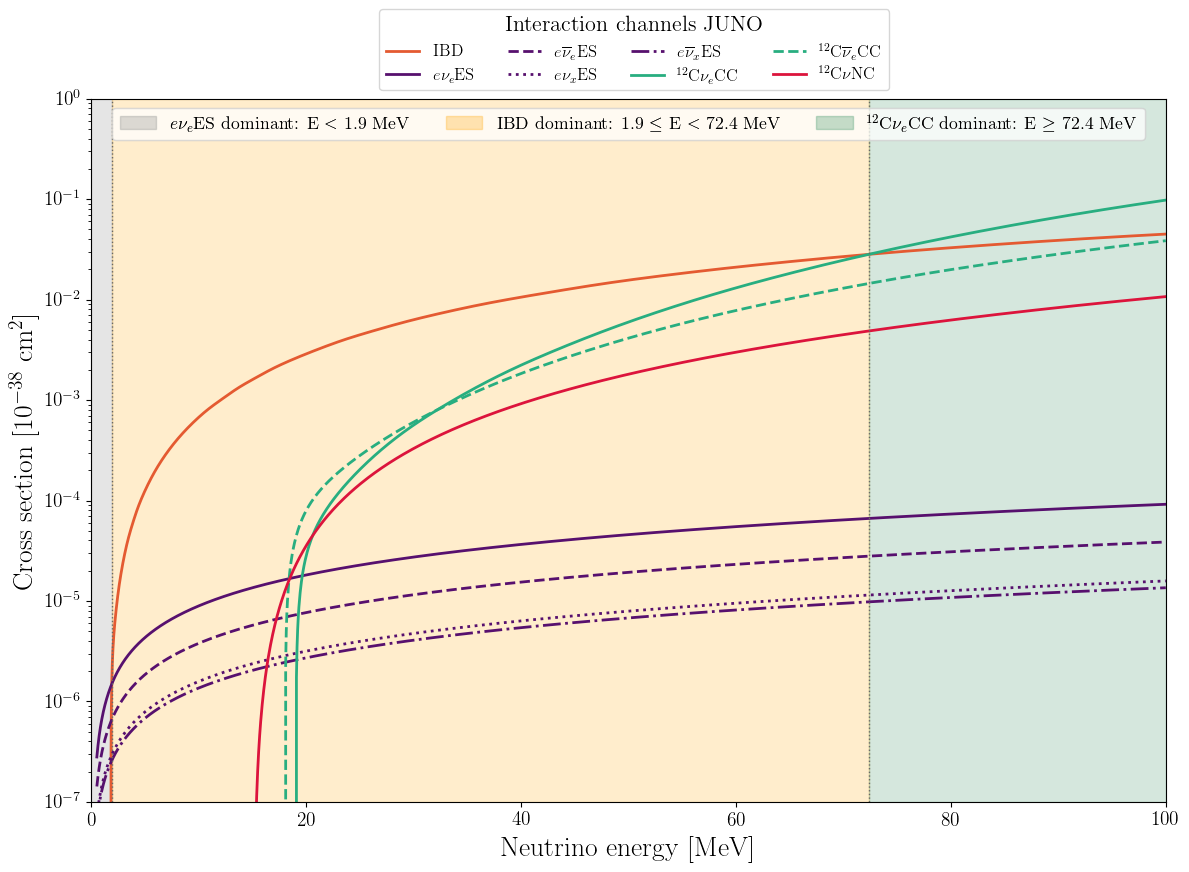

In [23]:
x = np.linspace(0, 100, 1000)
plot_total_cs(x, 'JUNO', save = True)

In [43]:
def cross_section_ES_nu_proton(x, flavor):
    if 'nubar' in flavor:
        ca = -1.27/2
    else:
        ca = 1.27/2
    m_p = 938.27
    cv = 0.04
    cm = 1.4
    G_F = 1.16e-5*1e-3*1e-3
    sigma = []
    for i in range(len(x)):
        T_max = 2*x[i]**2 / (m_p + 2*x[i])
        T = np.linspace(0, T_max, 10000)
        dsigma_dT = (m_p * G_F**2 / (2*np.pi* x[i]**2))*((cv + ca)**2 * x[i]**2 + (cv - ca)**2 * (x[i] - 4*T*x[i]*cm*ca)**2 - (cv**2 - ca**2)*m_p*T)
        sigma.append(simps(dsigma_dT, T))
    sigma = np.array(sigma)
    return sigma

In [46]:
x[np.where(x < 10)[0]]

array([1.00000000e-03, 1.01109091e+00, 2.02118182e+00, 3.03127273e+00,
       4.04136364e+00, 5.05145455e+00, 6.06154545e+00, 7.07163636e+00,
       8.08172727e+00, 9.09181818e+00])

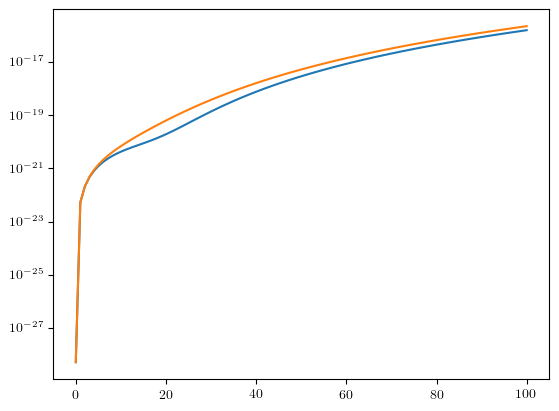

In [47]:
x = np.linspace(1e-3, 100, 100)
fig, ax = plt.subplots()
plt.plot(x, cross_section_ES_nu_proton(x, 'nu'))
plt.plot(x, cross_section_ES_nu_proton(x, 'nubar'))
plt.yscale('log')
plt.show()

In [48]:
ax.get_xticks()

array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120.])